# LayOff Dataset Used from Kaggle
## dataset will be provided in zip.
### https://www.kaggle.com/datasets/theakhilb/layoffs-data-2022/data
### For simplicity I removed most of the rows from the dataset manually and worked only with 1545 rows in total. The dataset I used is provided.
### Questions:
1. Load the layoffs dataset
2. Check all information about the dataset
3. Remove all rows containing null values and find percentage of deleted rows
4. Check the yearly layoffs
5. Show frequency of layoffs in Specific Countries using a bar chart
6. Show the total number of layoffs per unique industry
7. Plot a bar chart showing top 10 company layoffs

In [3]:
# Shadman Sakib M03543624
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1. Loading layoffs_data.csv in a pandas dataframe using only specific columns
layoffs = pd.read_csv('layoffs_data.csv', usecols=['Company', 'Location_HQ', 'Industry', 'Date', 'Funds_Raised', 'Country', 'Laid_Off_Count'])
layoffs.head(10)

,Company,Location_HQ,Industry,Date,Funds_Raised,Country,Laid_Off_Count
0,Farfetch,London,Retail,2/16/2024,1700.0,United Kingdom,NaN
1,Toast,Boston,Food,2/15/2024,962.0,United States,550.0
2,Storytel,Stockholm,Consumer,2/15/2024,312.0,Sweden,80.0
3,Gro Intelligence,New York City,Food,2/15/2024,118.0,United States,20.0
4,CodeSee,SF Bay Area,Data,2/15/2024,10.0,United States,NaN
5,May Mobility,Ann Arbor,Transportation,2/15/2024,303.0,United States,NaN
6,Cisco,SF Bay Area,Infrastructure,2/14/2024,2.0,United States,4250.0
7,Wint Wealth,Nashik,Finance,2/14/2024,16.0,India,19.0
8,Away,New York City,Retail,2/14/2024,181.0,United States,NaN
9,Instacart,SF Bay Area,Food,2/13/2024,2900.0,United States,250.0


In [4]:
for index, value in enumerate(layoffs.columns, start=1):
    print(f"Column {index}: {value}")

Column 1: Company
Column 2: Location_HQ
Column 3: Industry
Column 4: Date
Column 5: Funds_Raised
Column 6: Country
Column 7: Laid_Off_Count


In [5]:
layoffs.shape

(1545, 7)

In [6]:
# Checking the information of numeric columns
layoffs.describe()

,Funds_Raised,Laid_Off_Count
count,1328.000000,942.000000
mean,678.320557,321.149682
std,1989.933328,1005.452931
min,1.000000,5.000000
25%,67.000000,46.000000
50%,199.500000,100.000000
75%,517.250000,211.750000
max,26000.000000,12000.000000


In [7]:
# checking information on all columns
layoffs.describe(include='all')

,Company,Location_HQ,Industry,Date,Funds_Raised,Country,Laid_Off_Count
count,1545,1545,1545,1545,1328.000000,1545,942.000000
unique,1287,171,31,325,NaN,44,NaN
top,Amazon,SF Bay Area,Finance,1/18/2023,NaN,United States,NaN
freq,9,372,189,24,NaN,996,NaN
mean,NaN,NaN,NaN,NaN,678.320557,NaN,321.149682
std,NaN,NaN,NaN,NaN,1989.933328,NaN,1005.452931
min,NaN,NaN,NaN,NaN,1.000000,NaN,5.000000
25%,NaN,NaN,NaN,NaN,67.000000,NaN,46.000000
50%,NaN,NaN,NaN,NaN,199.500000,NaN,100.000000
75%,NaN,NaN,NaN,NaN,517.250000,NaN,211.750000


In [8]:
# Checking if any columns/rows contain null values
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1545 non-null   object 
 1   Location_HQ     1545 non-null   object 
 2   Industry        1545 non-null   object 
 3   Date            1545 non-null   object 
 4   Funds_Raised    1328 non-null   float64
 5   Country         1545 non-null   object 
 6   Laid_Off_Count  942 non-null    float64
dtypes: float64(2), object(5)
memory usage: 84.6+ KB


In [9]:
#Checking how many null values there are in each row in terms of percentage
print('Percentage of Missing Values')
(layoffs.isna().mean() * 100).round(1)

Percentage of Missing Values


Company            0.0
Location_HQ        0.0
Industry           0.0
Date               0.0
Funds_Raised      14.0
Country            0.0
Laid_Off_Count    39.0
dtype: float64

In [10]:
# Dropping rows containing null
layoffs.dropna(inplace=True)
layoffs.isna().mean()

Company           0.0
Location_HQ       0.0
Industry          0.0
Date              0.0
Funds_Raised      0.0
Country           0.0
Laid_Off_Count    0.0
dtype: float64

In [11]:
layoffs.shape

(816, 7)

In [12]:
# Checking how many rows were dropped and the percentage of it
print(1545 - 816, 'number of rows deleted')
print(f"{(1545- 816)*100/1545:.2f}% deleted")

729 number of rows deleted
47.18% deleted


In [13]:
# Function to get year from a string representation of a date that was in this form: 2/7/2024
def getYear(x):
  return x.split('/')[2]

# Adding year column for more stats
layoffs['Year'] = layoffs["Date"].apply(getYear)

In [14]:
# Checking the number of unique years in the dataset
print(layoffs.Year.unique())

['2024' '2023']


In [15]:
# Number of employees laid off in these 2 years
layoffs.groupby('Year')['Company'].count()

Year
2023    721
2024     95
Name: Company, dtype: int64

### Pie Chart showing the percentage of employees laid off in each year

(-1.0999999980867226,
 1.0999999999088916,
 -1.0999997821978913,
 1.0999997675832427)

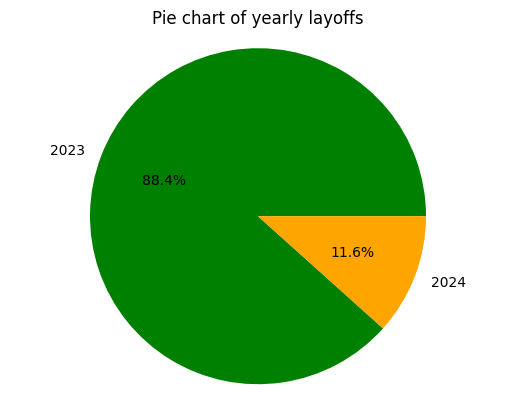

In [16]:
count_2023 = layoffs.groupby('Year')['Company'].count()['2023']
count_2024 = layoffs.groupby('Year')['Company'].count()['2024']
labels = ['2023', '2024']
plt.pie([count_2023, count_2024], labels=labels, colors=['green', 'orange'], autopct='%0.1f%%')
plt.title("Pie chart of yearly layoffs")
plt.axis('equal')

In [17]:
print(layoffs.Country.unique())

['United States' 'Sweden' 'India' 'Canada' 'Cayman Islands' 'Israel'
 'Czech Republic' 'Germany' 'Austria' 'United Kingdom' 'Indonesia'
 'Estonia' 'Singapore' 'China' 'Nigeria' 'France' 'Netherlands' 'Brazil'
 'Ghana' 'Kenya' 'Australia' 'Ireland' 'New Zealand' 'Spain' 'Norway'
 'Romania' 'Chile' 'Ukraine' 'South Korea' 'Japan' 'Colombia']


In [18]:
layoffs['Country'].value_counts()

United States     527
India              88
Canada             34
Germany            26
United Kingdom     22
Israel             22
Australia          18
Brazil             14
Sweden              8
France              7
Indonesia           6
Estonia             5
Singapore           4
China               4
Nigeria             4
Ireland             4
Spain               4
Kenya               3
New Zealand         3
Chile               2
Romania             1
Japan               1
South Korea         1
Ukraine             1
Cayman Islands      1
Norway              1
Ghana               1
Czech Republic      1
Netherlands         1
Austria             1
Colombia            1
Name: Country, dtype: int64

### Bar graph showing the frequency of layoffs per country. Most layoffs are occuring in the united states as compared to the others

Text(0, 0.5, 'Count')

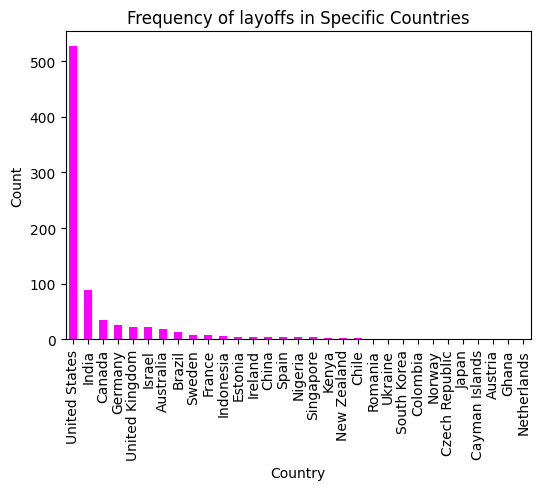

In [19]:
grouped = layoffs.groupby('Country').size().sort_values(ascending = False)
plt.figure(figsize=(6, 4))
grouped.plot(kind='bar', color='magenta')
plt.title('Frequency of layoffs in Specific Countries')
plt.xlabel('Country')
plt.ylabel('Count')

In [20]:
print(layoffs.Industry.unique())

['Food' 'Consumer' 'Infrastructure' 'Finance' 'Healthcare' 'Retail' 'Data'
 'Crypto' 'Sales' 'Education' 'Security' 'Other' 'Product'
 'Transportation' 'Travel' 'Energy' 'Media' 'Logistics' 'Marketing' 'HR'
 'Fitness' 'Hardware' 'AI' 'Real Estate' 'Aerospace' 'Legal' 'Recruiting'
 'Unknown' 'Manufacturing' 'Support' 'Construction']


In [21]:
layoffs[layoffs.Industry == 'Unknown']

,Company,Location_HQ,Industry,Date,Funds_Raised,Country,Laid_Off_Count,Year
389,Appsmith,SF Bay Area,Unknown,9/22/2023,51.0,United States,35.0,2023


In [22]:
#Removing the unknown industry
layoffs.drop(389, inplace=True)

### Bar graph showing the total number of layoffs in each industry. The top 5 are Retail, Consumer, Food, Finance and Transportation

Text(0, 0.5, 'Count')

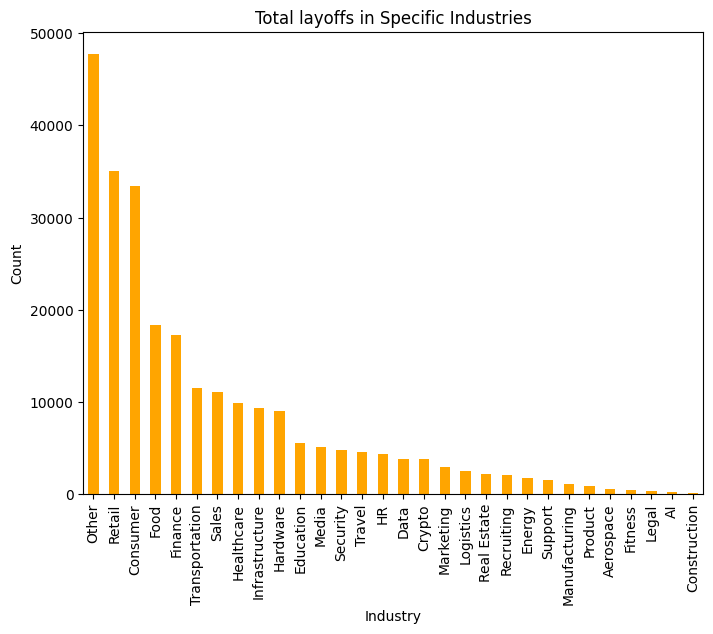

In [23]:
grouped = layoffs.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending = False)
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='orange')
plt.title('Total layoffs in Specific Industries')
plt.xlabel('Industry')
plt.ylabel('Count')

### Bar garph showing the total number of employees in laidoff in specific companies in descending order. The top company layoffs are happening in Amazon, Google and Microsoft

Text(0.5, 1.0, 'Top 10 company layoffs from 2023 - 2024')

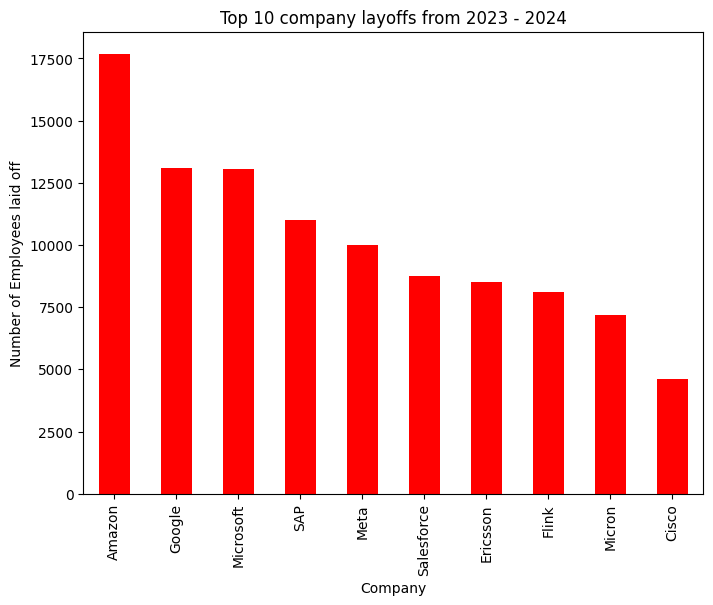

In [24]:
plt.figure(figsize= (8, 6))
industry_val = layoffs.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending = False).head(10)
industry_val.plot(label="", kind='bar', color='r')
plt.ylabel("Number of Employees laid off")
plt.title("Top 10 company layoffs from 2023 - 2024")